# Outlier treatement for Random Forest Regression

Random Forest is an ensemble method which uses the average of all the individual tree's (weak learners) prediction value. In most cases there would be some tree's which are producing poor results (worst learners). The method described below can be used to remove those outliers from the results thus a better prediction value can be obtained.

In [1]:
# Improrting libaries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Dataset
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

# Model Training
algo = RandomForestRegressor(random_state=0, n_jobs=-1)
model_RF_pl = Pipeline([('standardize',StandardScaler()),('rf',algo)])
model_RF_sk = model_RF_pl.fit(X, y)

In [4]:
# Function to remove the outlier values (outside 1.5*IQR) from a list
def remove_outlierIQR(data):
    try:
        Q1 = np.percentile(data, 25, interpolation = 'midpoint')
        Q3 = np.percentile(data, 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        LB = Q1 - 1.5*IQR
        UB = Q3 + 1.5*IQR
        data_f = [x for x  in data if (x <= UB and x >= LB)]
    except Exception as error:
        data_f = [x for x  in data]
    return data_f

# Function to find the average of predictions after removing the outlier predictions if any.
def predict_meannooutIQR(model_p, X_Data):
    pred_l = []
    for mod in model_p[1].estimators_:
        pred_l.append(mod.predict((model_p[0].transform(X_Data.reshape(1, -1))))[0])
    final_pred = remove_outlierIQR(pred_l)
    return np.mean(final_pred)

# Function to get all the individual tree predictions.
def get_all_tree_predictions(model_p, X_Data):
    pred_l = []
    for mod in model_p[1].estimators_:
        pred_l.append(mod.predict((model_p[0].transform(X_Data.reshape(1, -1))))[0])
    return pred_l

# Function to get all the individual tree predictions after removing outliers.
def get_all_tree_predictions_outlier_removed(model_p, X_Data):
    pred_l = []
    for mod in model_p[1].estimators_:
        pred_l.append(mod.predict((model_p[0].transform(X_Data.reshape(1, -1))))[0])
    fin_pred_l = remove_outlierIQR(pred_l)
    return fin_pred_l

In [5]:
sample_n = 9

print('True value: ', y[sample_n])
print('Scikit-learn prediction: ', model_RF_sk.predict(X[sample_n:sample_n+1])[0])
print('Outlier removed prediction: ', predict_meannooutIQR(model_RF_sk, X[sample_n:sample_n+1]))

True value:  0.41059850193837233
Scikit-learn prediction:  0.4571625573655762
Outlier removed prediction:  0.4099355626640138


From the below two histograms, it is clear that some of the predictions which are far from the mean value needed to be removed from the ensemble to improve the accuracy.

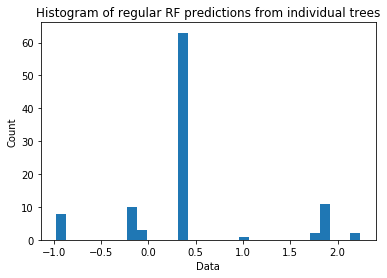

In [6]:
pred_all = get_all_tree_predictions(model_RF_sk, X[sample_n:sample_n+1])

plt.hist(pred_all, density=False, bins=30)  # density=False would make counts
plt.title('Histogram of regular RF predictions from individual trees')
plt.ylabel('Count')
plt.xlabel('Data');

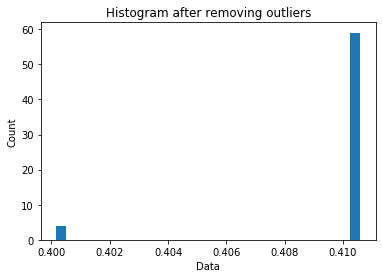

In [7]:
pred_all = get_all_tree_predictions_outlier_removed(model_RF_sk, X[sample_n:sample_n+1])

plt.hist(pred_all, density=False, bins=30)  # density=False would make counts
plt.title('Histogram after removing outliers')
plt.ylabel('Count')
plt.xlabel('Data');